<a href="https://colab.research.google.com/github/plaban1981/Pytorch_DL/blob/main/Pytorch_For_data_Scientist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://mlwhiz.com/blog/2020/09/09/pytorch_guide/?utm_campaign=the-most-complete-guide-to-pytorch-for-data-scientists&utm_medium=social_link&utm_source=missinglettr

## Import Required libraries

In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.12.1+cu113
True


## Tensors

* basic building blocks in pytorch
* numpy array in GPU

## Create a Tensor

In [ ]:
t = torch.Tensor([[1,2,3],[3,4,5]])
print(t)

tensor([[1., 2., 3.],
        [3., 4., 5.]])


In [ ]:
print(type(t))

<class 'torch.Tensor'>


In [ ]:
t = torch.randn(3,5)# returns a tensor filled with random numbers
print(t)

tensor([[ 0.9553, -0.7328, -0.0074,  0.6994, -0.8065],
        [-0.1264,  0.1143, -1.1705,  0.0699,  0.3258],
        [ 0.6820,  0.4084,  0.1592,  0.5664, -0.9768]])


In [ ]:
#using torch.[ones|zeros](*size)
t = torch.ones(3,5)
print(t)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [ ]:
t= torch.zeros(3,5)
print(t)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [ ]:
#using torch.randint - a tensor of size 4,5 with entries between 0 and 10 (excluded)
t = torch.randint(low=0,high=10,size=(4,5))
print(t)

tensor([[2, 4, 1, 7, 2],
        [3, 0, 4, 7, 0],
        [2, 0, 2, 7, 1],
        [7, 7, 2, 2, 8]])


In [ ]:
# Using from Numpy to convert from Numpy Array to Tensor
import numpy as np
a = np.array([[1,2,3],[3,4,5]])
t = torch.from_numpy(a)
print(t)

tensor([[1, 2, 3],
        [3, 4, 5]])


In [ ]:
#Using .numpy() to convert numpy array from tensor
print(type(t))
t = t.numpy()
print(type(t))
print(t)

<class 'torch.Tensor'>
<class 'numpy.ndarray'>
[[1 2 3]
 [3 4 5]]


## Tensor Operations

In [ ]:
A = torch.randn(3,4)
W = torch.randn(4,2)
print(f"Print element A :\n {A}")
print(f"Print element W :\n {W}")
#Multiply Matrix A and W
t = A.mm(W)
print(f"Print Matrix Multiplication A and W :\n {t}")
#Transpose Tensor t
t = t.t()
print(f"Print transpose of t :\n {t}")
#Square of each element t
t = t **2
print(f"Print square of each element t :\n {t}")
print(f"Size of the Tensor t using .size() : \n {t.size()}")

Print element A :
 tensor([[-0.5915, -1.1930, -0.3732,  0.8377],
        [-0.7592,  0.3264,  0.5642,  0.4540],
        [-1.1025, -1.4877, -1.5566, -1.0080]])
Print element W :
 tensor([[ 0.8424, -0.2640],
        [-1.9174, -2.0466],
        [-2.4196, -1.0298],
        [-0.0933, -0.6152]])
Print Matrix Multiplication A and W :
 tensor([[ 2.6140,  2.4667],
        [-2.6729, -1.3279],
        [ 5.7842,  5.5587]])
Print transpose of t :
 tensor([[ 2.6140, -2.6729,  5.7842],
        [ 2.4667, -1.3279,  5.5587]])
Print square of each element t :
 tensor([[ 6.8331,  7.1445, 33.4570],
        [ 6.0847,  1.7634, 30.8993]])
Size of the Tensor t using .size() : 
 torch.Size([2, 3])


## nn.Module

* Pytorch while creating deep learning projects nn.Module lets us create Deep Learning Models as a class.
* We can inherit from nn.Module define any model as a class.
* Every Model class necessarily contains "__init__" block  and a block for forward pass
* In the forward pass block the user defines how data flows from one layer to another inside the network

In [ ]:
import torch.nn as nn
class myNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(784,30)
    self.lin2 = nn.Linear(30,10)
  def forward(self,x):
    x = self.lin1(x)
    x = self.lin2(x)
    return x



* Send back the output from the second linear layer to the first one after assing the input to it(Skip connection)

In [ ]:
class myCrazyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Define all Layers Here
        self.lin1 = nn.Linear(784, 30)
        self.lin2 = nn.Linear(30, 784)
        self.lin3 = nn.Linear(30, 10)

    def forward(self, x):
        # Connect the layer Outputs here to define the forward pass
        x_lin1 = self.lin1(x)
        x_lin2 = x + self.lin2(x_lin1)
        x_lin2 = self.lin1(x_lin2)
        x = self.lin3(x_lin2)
        return x

In [ ]:
x = torch.randn((100,784))

In [ ]:
x.shape

torch.Size([100, 784])

In [ ]:
x = torch.randn((100,784))
model = myCrazyNeuralNet()
model(x).size()

torch.Size([100, 10])

##Custom Linear Layer
* rather than using the predefined Linear Layer nn.Linear from Pytorch using cutsom linear layer

In [ ]:
class myCustomLinearLayer(nn.Module):
    def __init__(self,in_size,out_size):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(in_size, out_size))
        self.bias = nn.Parameter(torch.zeros(out_size))
    def forward(self, x):
        return x.mm(self.weights) + self.bias

* Parameters are <code>*Tensor*</code> subclasses, that have a very special property when used with Module - 

* when they’re assigned as Module attributes they are automatically added to the list of its parameters, and will appear in parameters() iterator

* we can now use this custom layer in any PyTorch network

In [ ]:
class myCustomNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        # Define all Layers Here
        self.lin1 = myCustomLinearLayer(784,10)

    def forward(self, x):
        # Connect the layer Outputs here to define the forward pass
        x = self.lin1(x)
        return x

In [ ]:
x = torch.randn((100,784))
model = myCustomNeuralNet()
model(x).size()

torch.Size([100, 10])

## Convolutional Layer

*  Conv2d Layer needs as input an Image of **height H** and **width W**, with **Cin channels**. 
*  Now, for the first layer in a convnet, the number of in_channels would be 3(RGB), and the number of out_channels can be defined by the user. 
* The **kernel_size mostly used is 3x3**, and the **stride normally used is 1**.

In [ ]:
conv_layer = torch.nn.Conv2d(in_channels = 3, 
                       out_channels = 64, 
                       kernel_size = (3,3), 
                       stride = 1, 
                       padding=1)

#### How would we pass data to our Neural nets while training or while testing? 
* We can definitely pass tensors as we will be doing it below
* And then pass some random input through it. Here 100 is the batch size.

In [ ]:
x = torch.randn((100,3,24,24))
x.size()

torch.Size([100, 3, 24, 24])

In [ ]:
conv_layer(x).size()#out channels =64

torch.Size([100, 64, 24, 24])

## Datasets and DataLoaders

* Pytorch also provides us with pre-built Datasets to make it easier for us to pass data to our neural nets
  - torchvision.datasets and 
  - torchtext.datasets 

## Example
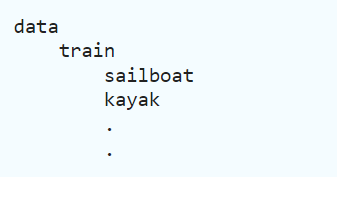


We can use torchvision.datasets.ImageFolder dataset to get an example image like below:

## Import required Libraries

In [2]:
import torch
from collections import Counter
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split
import os
from glob import glob
from torchvision import transforms
from torchvision import datasets
from torch.utils.data import DataLoader
from torchvision import models
import torch.nn as nn
#from torchsummary import summary
from torchvision import transforms, datasets, models
import torch
from torch import optim, cuda
from torch.utils.data import DataLoader, sampler
import torch.nn as nn
import numpy as np
import tqdm
#
from timeit import default_timer as timer

## Logic to download images

In [ ]:
! pip install -q duckduckgo_search

     |████████████████████████████████| 96 kB 3.0 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 357 kB 25.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')


searches = 'Forest','Mountain'
path = Path('Forest_or_not_test')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)




Searching for 'Forest photo'
Searching for 'Forest sun photo'
Searching for 'Forest shade photo'
Searching for 'Mountain photo'
Searching for 'Mountain sun photo'
Searching for 'Mountain shade photo'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

0

## Download data from kaggle

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"plabannayak","key":"f1f19a1783935d871fc0049a716ef3a8"}'}

In [4]:
!mkdir -p ~/.kaggle                                               
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
kaggleashwin/population-dataset                                World Population by Countries Dataset (1960-2021)    69KB  2022-08-31 05:30:26           1350         66  1.0              
iamsouravbanerjee/house-rent-prediction-dataset                House Rent Prediction Dataset                        82KB  2022-08-20 13:49:03           9635        261  1.0              
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           3362        123  1.0              
sveta151/tiktok-popular-songs-2021                             Ti

In [5]:
! kaggle datasets download -d clorichel/boat-types-recognition 

 99% 837M/842M [00:09<00:00, 97.9MB/s]
100% 842M/842M [00:09<00:00, 90.3MB/s]


In [19]:
! unzip "/content/boat-types-recognition.zip" -d "/content/Data"

Archive:  /content/boat-types-recognition.zip
  inflating: /content/Data/boats/buoy/alaska-ocean-warning-light-sea-2574393.jpg  
  inflating: /content/Data/boats/buoy/anchor-warp-rope-buoy-beach-2881563.jpg  
  inflating: /content/Data/boats/buoy/beach-buoy-w-water-sea-ocean-1042883.jpg  
  inflating: /content/Data/boats/buoy/beacon-lighthouse-coast-navigation-39232.jpg  
  inflating: /content/Data/boats/buoy/blue-boat-buoy-floating-2834157.jpg  
  inflating: /content/Data/boats/buoy/blue-buoy-float-navigation-ocean-20511.jpg  
  inflating: /content/Data/boats/buoy/boat-water-bird-beach-sand-2840152.jpg  
  inflating: /content/Data/boats/buoy/bojka-buoy-water-bojka-rescue-882679.jpg  
  inflating: /content/Data/boats/buoy/buoy-beach-sea-buoys-scenic-242727.jpg  
  inflating: /content/Data/boats/buoy/buoy-beacon-sea-beach-sand-2266571.jpg  
  inflating: /content/Data/boats/buoy/buoy-beacon-water-blue-yellow-1661196.jpg  
  inflating: /content/Data/boats/buoy/buoy-buoy-marker-ocean-sea-s

In [52]:
categories = glob("Data/"+"*")

In [53]:
categories

['Data/cruise ship',
 'Data/ferry boat',
 'Data/buoy',
 'Data/sailboat',
 'Data/inflatable boat',
 'Data/kayak',
 'Data/gondola',
 'Data/freight boat',
 'Data/paper boat',
 'Data/boats']

In [54]:
filedf = pd.DataFrame()
for cat in categories:
    files = glob(cat+"/*")
    tempdf = pd.DataFrame({'filepath':files,'category':cat.split("/")[-1]})
    filedf = pd.concat([filedf,tempdf])

In [55]:
filedf.head()

,filepath,category
0,Data/cruise ship/ocean-cruise-tourist-travel-t...,cruise ship
1,Data/cruise ship/lighthouse-cruise-ship-belize...,cruise ship
2,Data/cruise ship/sydney-australia-sydney-opera...,cruise ship
3,Data/cruise ship/cruise-ship-cruiser-cruise-sh...,cruise ship
4,Data/cruise ship/aida-driving-cruise-ship-sea-...,cruise ship


In [56]:
filedf['category'].value_counts()

sailboat           488
kayak              254
gondola            242
cruise ship        239
ferry boat          81
buoy                68
paper boat          40
freight boat        29
inflatable boat     21
boats                9
Name: category, dtype: int64

In [59]:
gby_cnt = filedf.groupby("category").aggregate('count').rename(columns = {'filepath':'cnt'}).reset_index().sort_values(by='cnt',ascending=False)

In [60]:
gby_cnt

,category,cnt
9,sailboat,488
7,kayak,254
5,gondola,242
2,cruise ship,239
3,ferry boat,81
1,buoy,68
8,paper boat,40
4,freight boat,29
6,inflatable boat,21
0,boats,9


In [61]:

focus_cats = gby_cnt[gby_cnt['cnt'] >=40]['category'].values
filedf  = filedf[filedf['category'].isin(focus_cats)]
filedf['category'].value_counts()


sailboat       488
kayak          254
gondola        242
cruise ship    239
ferry boat      81
buoy            68
paper boat      40
Name: category, dtype: int64

## Split the data set into training ,test and validation set 

In [62]:
X_train, X_test, _, _ = train_test_split(
        filedf, filedf['category'],stratify=filedf['category'], test_size=0.4)

X_test, X_val, _, _ = train_test_split(
        X_test, X_test['category'], stratify=X_test['category'], test_size=0.5)

In [63]:
X_train['type'] = 'train'
X_val['type'] = 'val'
X_test['type'] = 'test'

In [64]:
fulldf = pd.concat([X_train,X_test,X_val])

In [65]:
fulldf.head()

,filepath,category,type
330,Data/sailboat/port-ship-boat-marina-yacht-3007...,sailboat,train
190,Data/sailboat/sailing-ship-ocean-sea-water-377...,sailboat,train
267,Data/sailboat/model-boat-sailboat-yacht-sail-s...,sailboat,train
120,Data/kayak/canoe-kayak-boat-water-paddle-36431...,kayak,train
320,Data/sailboat/boat-sailing-sail-ship-nautical-...,sailboat,train


## Creating train val test folders

In [49]:
!mkdir image
!rm -rf image/
!rm -rf image/train
!rm -rf image/test
!rm -rf image/val
!mkdir image/
!mkdir image/train
!mkdir image/test
!mkdir image/val

In [35]:
fulldf.category.unique()

array(['sailboat', 'gondola', 'buoy', 'kayak', 'cruise ship',
       'ferry boat', 'paper boat'], dtype=object)

In [50]:
for cat in fulldf.category.unique():
    os.system(f"mkdir image/train/'{cat}'") 
    os.system(f"mkdir image/test/'{cat}'") 
    os.system(f"mkdir image/val/'{cat}'") 

## copy images to respective train test and validation folders

In [66]:
for i,row in fulldf.iterrows():
    # Boat category
    cat = row['category']
    # section is train,val or test
    section = row['type']
    # input filepath to copy
    ipath = row['filepath']
    # output filepath to paste
    opath = ipath.replace(f"Data/",f"image/{section}/")
    # running the cp command
    os.system(f"cp '{ipath}' '{opath}'")

In [ ]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
traindir = "/content/Forest_or_not_train"
t = transforms.Compose([
        transforms.Resize(size=256),
    transforms.CenterCrop(size=224),
        transforms.ToTensor()])
train_dataset = ImageFolder(root=traindir,transform=t)
print("Num Images in Dataset:", len(train_dataset))
print("Example Image and Label:", train_dataset[2])
print("size Image and Label:", train_dataset[2][0].size())

Num Images in Dataset: 563
Example Image and Label: (tensor([[[0.5373, 0.5216, 0.4745,  ..., 0.4275, 0.3647, 0.2980],
         [0.4353, 0.4667, 0.4549,  ..., 0.4667, 0.3922, 0.3294],
         [0.4314, 0.4784, 0.4667,  ..., 0.6549, 0.4510, 0.3922],
         ...,
         [0.2000, 0.1490, 0.1412,  ..., 0.1686, 0.1569, 0.1725],
         [0.2353, 0.1765, 0.1412,  ..., 0.2039, 0.1686, 0.1608],
         [0.2824, 0.2431, 0.2549,  ..., 0.1922, 0.1765, 0.2000]],

        [[0.4627, 0.4627, 0.4275,  ..., 0.4078, 0.3529, 0.2941],
         [0.3922, 0.4196, 0.4118,  ..., 0.4471, 0.3765, 0.3255],
         [0.3216, 0.3765, 0.3765,  ..., 0.6314, 0.4314, 0.3843],
         ...,
         [0.1373, 0.0902, 0.0784,  ..., 0.1490, 0.1373, 0.1569],
         [0.1725, 0.1098, 0.0745,  ..., 0.1804, 0.1451, 0.1412],
         [0.2157, 0.1804, 0.1882,  ..., 0.1647, 0.1490, 0.1725]],

        [[0.1333, 0.1686, 0.1725,  ..., 0.4078, 0.3490, 0.2863],
         [0.1255, 0.1882, 0.2000,  ..., 0.4471, 0.3725, 0.3176],
     

In [ ]:
for i in range(0,len(train_dataset)):
    image ,label = train_dataset[i]
    print(image.size())
    print(type(image))
    #model = myCustomNeuralNet()
    #model(image.numpy()).size()
    #pred = model(image)
    break

torch.Size([3, 224, 224])
<class 'torch.Tensor'>


* Pytorch provides us with a utility iterator **torch.utils.data.DataLoader** to append images and labels in a batch and then pass it to the Neural network

In [ ]:
train_dataloader = DataLoader(train_dataset,batch_size = 64, shuffle=True, num_workers=10)
for image_batch, label_batch in train_dataloader:
    print(image_batch.size(),label_batch.size())
    break

torch.Size([64, 3, 224, 224]) torch.Size([64])


## Image Net Processing

In [38]:
from torchvision import *
tfms  = transforms.Compose([
        transforms.CenterCrop(size=224),  
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  
    ])

## Data Augmentations

In [39]:
# Image transformations
image_transforms = {
    # Train uses data augmentation
    'train':
    transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),  # Image net standards
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])  # Imagenet standards
    ]),
    # Validation does not use augmentation
    'valid':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),

        # Test does not use augmentation
    'test':
    transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [40]:
image_transforms

{'train': Compose(
     RandomResizedCrop(size=(256, 256), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear)
     RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=None, contrast=None, saturation=None, hue=None)
     RandomHorizontalFlip(p=0.5)
     CenterCrop(size=(224, 224))
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ), 'valid': Compose(
     Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
     CenterCrop(size=(224, 224))
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 ), 'test': Compose(
     Resize(size=256, interpolation=bilinear, max_size=None, antialias=None)
     CenterCrop(size=(224, 224))
     ToTensor()
     Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
 )}

In [41]:
def imshow_tensor(image, ax=None, title=None):
    """Imshow for Tensor."""

    if ax is None:
        fig, ax = plt.subplots()

    # Set the color channel as the third dimension
    image = image.numpy().transpose((1, 2, 0))

    # Reverse the preprocessing steps
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    image = std * image + mean

    # Clip the image pixel values
    image = np.clip(image, 0, 1)

    ax.imshow(image)
    plt.axis('off')

    return ax, image

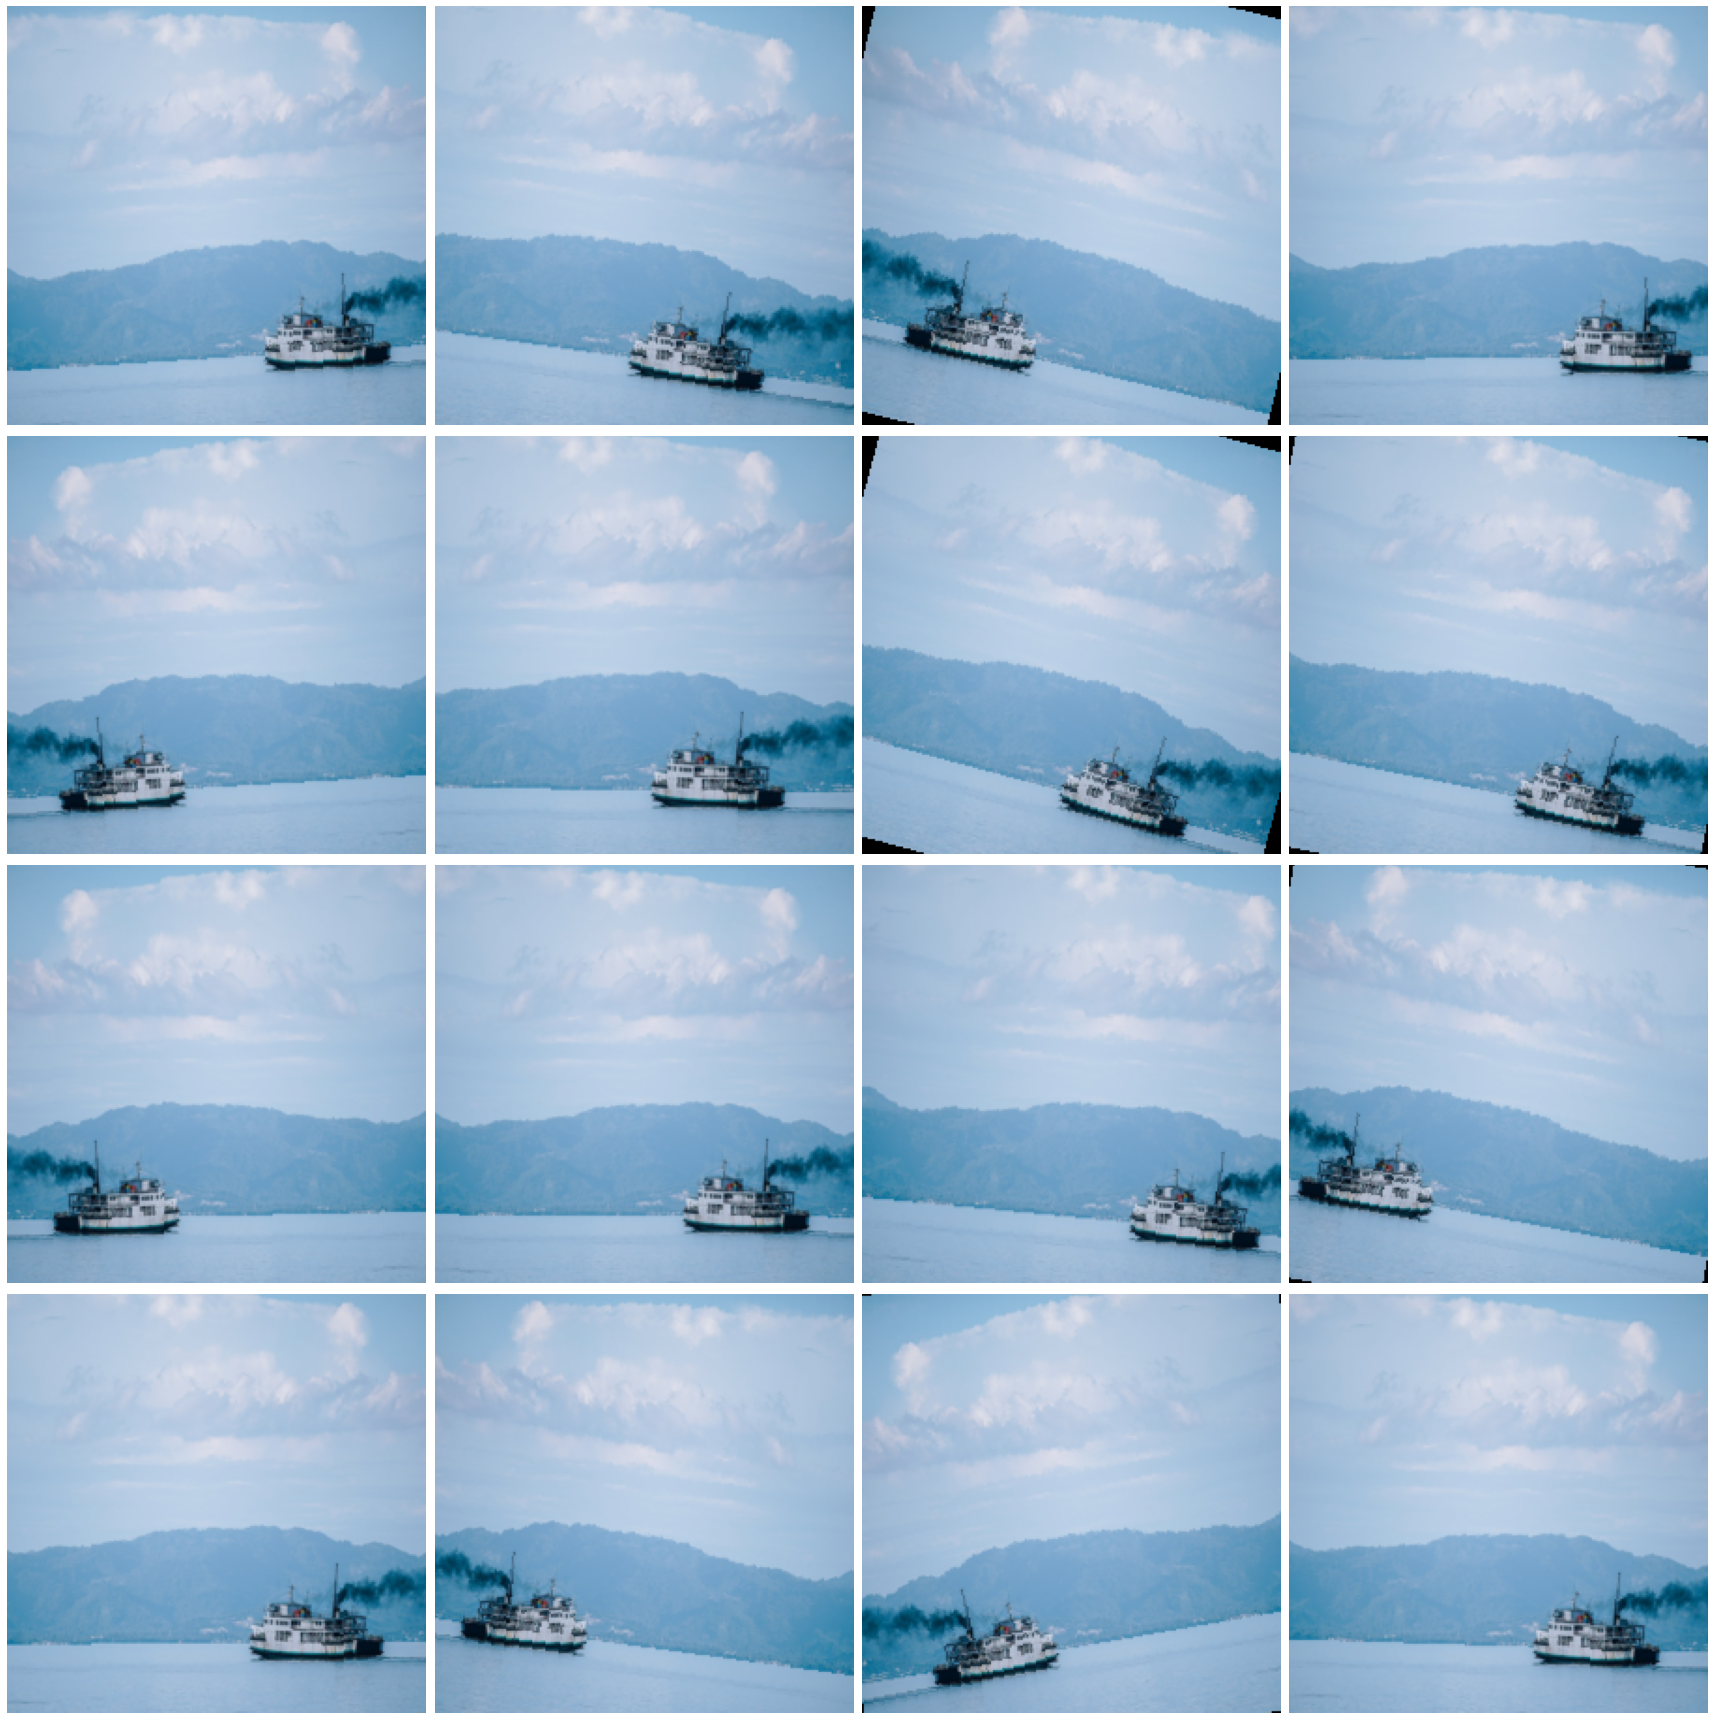

In [42]:
import matplotlib.pyplot as plt
import PIL
ex_img = PIL.Image.open('/content/Data/boats/ferry boat/beach-beautiful-blue-boat-cruise-3741909.jpg')
t = image_transforms['train']
plt.figure(figsize=(24, 24))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    _ = imshow_tensor(t(ex_img), ax=ax)
plt.tight_layout()

## DataLoaders
* The next step is to provide the training, validation, and test dataset locations to PyTorch. 

* We can do this by using the PyTorch datasets and DataLoader class. 

* This part of the code will mostly remain the same if we have our data in the required directory structures.

In [68]:
# Datasets from folders
traindir = "/content/image/train"
validdir = "/content/image/val"
testdir = "/content/image/test"
batch_size = 512
data = {
    'train':
    datasets.ImageFolder(root=traindir, transform=image_transforms['train']),
    'valid':
    datasets.ImageFolder(root=validdir, transform=image_transforms['valid']),
    'test':
    datasets.ImageFolder(root=testdir, transform=image_transforms['test'])
}
# Dataloader iterators, make sure to shuffle
dataloaders = {
    'train': DataLoader(data['train'], batch_size=batch_size, shuffle=True,num_workers=10),
    'val': DataLoader(data['valid'], batch_size=batch_size, shuffle=True,num_workers=10),
    'test': DataLoader(data['test'], batch_size=batch_size, shuffle=True,num_workers=10)
}

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 10 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


* These **dataloaders** help us to iterate through the dataset. 

* For example, we will use the dataloader below in our model training. 
* The data variable will contain data in the form **(batch_size, color_channels, height, width)** 
* the target is of shape **(batch_size)** and hold the label information.

In [ ]:
dataloaders['train']

In [69]:
# Iterate through the dataloader once
trainiter = iter(dataloaders['train'])
features, labels = next(trainiter)
features.shape, labels.shape

(torch.Size([512, 3, 224, 224]), torch.Size([512]))

## Using GPU/Multiple GPUs

Till now, whatever we have done is on the CPU. If you want to use a GPU, you can put your model to GPU using model.to('cuda'). Or if you want to use multiple GPUs, you can use nn.DataParallel. Here is a utility function that checks the number of GPUs in the machine and sets up parallel training automatically using DataParallel if needed.

In [76]:
save_file_name = f'resnet50-transfer.pt'
checkpoint_path = f'resnet50-transfer.pth'

# Whether to train on a gpu
train_on_gpu = torch.cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')

# Number of gpus
if train_on_gpu:
    gpu_count = torch.cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False
print(train_on_gpu,multi_gpu)


Train on gpu: True
1 gpus detected.
True False


## Determine categories

In [77]:
categories = []
for d in os.listdir(traindir):
    categories.append(d)
    
n_classes = len(categories)
print(f'There are {n_classes} different classes.')

There are 7 different classes.


## Data Statistics

In [78]:
 data['train'].class_to_idx

{'buoy': 0,
 'cruise ship': 1,
 'ferry boat': 2,
 'gondola': 3,
 'kayak': 4,
 'paper boat': 5,
 'sailboat': 6}

In [79]:
class_to_idx = data['train'].class_to_idx
idx_to_class = {
    idx: class_
    for class_, idx in data['train'].class_to_idx.items()
}

In [81]:
idx_to_class 

{0: 'buoy',
 1: 'cruise ship',
 2: 'ferry boat',
 3: 'gondola',
 4: 'kayak',
 5: 'paper boat',
 6: 'sailboat'}

In [82]:
train_cnts = Counter([idx_to_class[x] for x in data['train'].targets])
val_cnts = Counter([idx_to_class[x] for x in data['valid'].targets])
test_cnts = Counter([idx_to_class[x] for x in data['test'].targets])

In [83]:
train_cnts = pd.DataFrame({'cat' :list(train_cnts.keys()), 'train_cnt': list(train_cnts.values())})
val_cnts = pd.DataFrame({'cat' :list(val_cnts.keys()), 'val_cnt': list(val_cnts.values())})
test_cnts = pd.DataFrame({'cat' :list(test_cnts.keys()), 'test_cnt': list(test_cnts.values())})

In [84]:
cnt_df = pd.merge(train_cnts,val_cnts,on='cat',how='left').merge(test_cnts,on='cat',how='left')
cnt_df.head()

,cat,train_cnt,val_cnt,test_cnt
0,buoy,41,13,14
1,cruise ship,143,48,48
2,ferry boat,49,16,16
3,gondola,145,49,48
4,kayak,152,51,51


## Create Models

#### Create the model using a pre-trained model
Right now these following pre-trained models are available to use in the torchvision library:

* AlexNet
* VGG
* ResNet
* SqueezeNet
* DenseNet
* Inception v3
* GoogLeNet
* ShuffleNet v2
* MobileNet v2
* ResNeXt
* Wide ResNet
* MNASNet

Here we will be using resnet50 on our dataset, but you can effectively use any other model too as per your choice.

In [10]:
model = models.resnet50(pretrained=True)

NameError: ignored

#### We start by freezing our model weights since we don’t want to change the weights for the renet50 models.

In [71]:
# Freeze model weights
for param in model.parameters():
    param.requires_grad = False

In [72]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

* Here we find that the final linear layer that takes the input from the convolutional layers is named fc

* We can now simply replace the fc layer using our custom neural network. 

* This neural network takes input from the previous layer to fc and gives the log softmax output of shape (batch_size x n_classes).

In [73]:
n_inputs = model.fc.in_features

In [74]:
n_inputs

2048

In [85]:
n_classes

7

## Fully Connected head

In [86]:
model.fc = nn.Sequential(
                      nn.Linear(n_inputs, 256), 
                      nn.ReLU(), 
                      nn.Dropout(0.4),
                      nn.Linear(256, n_classes),                   
                      nn.LogSoftmax(dim=1))

In [87]:
model.fc

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=7, bias=True)
  (4): LogSoftmax(dim=1)
)

## Total Parameters

In [88]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

24,034,375 total parameters.
526,343 training parameters.


## Load the model on GPU

* We can use a single GPU or multiple GPU(if we have them) using DataParallel from PyTorch. 

In [89]:
# Whether to train on a gpu
train_on_gpu = cuda.is_available()
print(f'Train on gpu: {train_on_gpu}')
# Number of gpus
if train_on_gpu:
    gpu_count = cuda.device_count()
    print(f'{gpu_count} gpus detected.')
    if gpu_count > 1:
        multi_gpu = True
    else:
        multi_gpu = False
if train_on_gpu:
    model = model.to('cuda')
if multi_gpu:
    model = nn.DataParallel(model)

Train on gpu: True
1 gpus detected.


In [90]:
if multi_gpu:
    print(model.module.fc)
else:
    print(model.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.4, inplace=False)
  (3): Linear(in_features=256, out_features=7, bias=True)
  (4): LogSoftmax(dim=1)
)


## Define criterion and optimizers

In [91]:
from torch import optim
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [92]:
for p in optimizer.param_groups[0]['params']:
    if p.requires_grad:
        print(p.shape)

torch.Size([256, 2048])
torch.Size([256])
torch.Size([7, 256])
torch.Size([7])


## Training the model
Given below is the full code used to train the model. It might look pretty big on its own, but essentially what we are doing is as follows:

* Start running epochs. In each epoch-
* Set the model mode to train using model.train().
* Loop through the data using the train dataloader.
* Load your data to the GPU using the data, target = data.cuda(), target.cuda() command
* Set the existing gradients in the optimizer to zero using optimizer.zero_grad()
* Run the forward pass through the batch using output = model(data)
* Compute loss using loss = criterion(output, target)
* Backpropagate the losses through the network using loss.backward()
* Take an optimizer step to change the weights in the whole network using optimizer.step()
* All the other steps in the training loop are just to maintain the history and calculate accuracy.
* Set the model mode to eval using model.eval().
* Get predictions for the validation data using valid_loader and calculate valid_loss and valid_acc
* Print the validation loss and validation accuracy results every print_every epoch.
* Save the best model based on validation loss.
* Early Stopping: If the cross-validation loss doesn’t improve for max_epochs_stop stop the training and load the best available model with the minimum validation loss.

In [93]:
def train(model,
          criterion,
          optimizer,
          train_loader,
          valid_loader,
          save_file_name,
          max_epochs_stop=3,
          n_epochs=20,
          print_every=1):
    """Train a PyTorch Model

    Params
    --------
        model (PyTorch model): cnn to train
        criterion (PyTorch loss): objective to minimize
        optimizer (PyTorch optimizier): optimizer to compute gradients of model parameters
        train_loader (PyTorch dataloader): training dataloader to iterate through
        valid_loader (PyTorch dataloader): validation dataloader used for early stopping
        save_file_name (str ending in '.pt'): file path to save the model state dict
        max_epochs_stop (int): maximum number of epochs with no improvement in validation loss for early stopping
        n_epochs (int): maximum number of training epochs
        print_every (int): frequency of epochs to print training stats

    Returns
    --------
        model (PyTorch model): trained cnn with best weights
        history (DataFrame): history of train and validation loss and accuracy
    """

    # Early stopping intialization
    epochs_no_improve = 0
    valid_loss_min = np.Inf

    valid_max_acc = 0
    history = []

    # Number of epochs already trained (if using loaded in model weights)
    try:
        print(f'Model has been trained for: {model.epochs} epochs.\n')
    except:
        model.epochs = 0
        print(f'Starting Training from Scratch.\n')

    overall_start = timer()

    # Main loop
    for epoch in range(n_epochs):

        # keep track of training and validation loss each epoch
        train_loss = 0.0
        valid_loss = 0.0

        train_acc = 0
        valid_acc = 0

        # Set to training
        model.train()
        start = timer()

        # Training loop
        for ii, (data, target) in enumerate(train_loader):
            # Tensors to gpu
            if train_on_gpu:
                data, target = data.cuda(), target.cuda()

            # Clear gradients
            optimizer.zero_grad()
            # Predicted outputs are log probabilities
            output = model(data)

            # Loss and backpropagation of gradients
            loss = criterion(output, target)
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Track train loss by multiplying average loss by number of examples in batch
            train_loss += loss.item() * data.size(0)

            # Calculate accuracy by finding max log probability
            _, pred = torch.max(output, dim=1)
            correct_tensor = pred.eq(target.data.view_as(pred))
            # Need to convert correct tensor from int to float to average
            accuracy = torch.mean(correct_tensor.type(torch.FloatTensor))
            # Multiply average accuracy times the number of examples in batch
            train_acc += accuracy.item() * data.size(0)

            # Track training progress
            print(
                f'Epoch: {epoch}\t{100 * (ii + 1) / len(train_loader):.2f}% complete. {timer() - start:.2f} seconds elapsed in epoch.',
                end='\r')

        # After training loops ends, start validation
        else:
            model.epochs += 1

            # Don't need to keep track of gradients
            with torch.no_grad():
                # Set to evaluation mode
                model.eval()

                # Validation loop
                for data, target in valid_loader:
                    # Tensors to gpu
                    if train_on_gpu:
                        data, target = data.cuda(), target.cuda()

                    # Forward pass
                    output = model(data)

                    # Validation loss
                    loss = criterion(output, target)
                    # Multiply average loss times the number of examples in batch
                    valid_loss += loss.item() * data.size(0)

                    # Calculate validation accuracy
                    _, pred = torch.max(output, dim=1)
                    correct_tensor = pred.eq(target.data.view_as(pred))
                    accuracy = torch.mean(
                        correct_tensor.type(torch.FloatTensor))
                    # Multiply average accuracy times the number of examples
                    valid_acc += accuracy.item() * data.size(0)

                # Calculate average losses
                train_loss = train_loss / len(train_loader.dataset)
                valid_loss = valid_loss / len(valid_loader.dataset)

                # Calculate average accuracy
                train_acc = train_acc / len(train_loader.dataset)
                valid_acc = valid_acc / len(valid_loader.dataset)

                history.append([train_loss, valid_loss, train_acc, valid_acc])

                # Print training and validation results
                if (epoch + 1) % print_every == 0:
                    print(
                        f'\nEpoch: {epoch} \tTraining Loss: {train_loss:.4f} \tValidation Loss: {valid_loss:.4f}'
                    )
                    print(
                        f'\t\tTraining Accuracy: {100 * train_acc:.2f}%\t Validation Accuracy: {100 * valid_acc:.2f}%'
                    )

                # Save the model if validation loss decreases
                if valid_loss < valid_loss_min:
                    # Save model
                    torch.save(model.state_dict(), save_file_name)
                    # Track improvement
                    epochs_no_improve = 0
                    valid_loss_min = valid_loss
                    valid_best_acc = valid_acc
                    best_epoch = epoch

                # Otherwise increment count of epochs with no improvement
                else:
                    epochs_no_improve += 1
                    # Trigger early stopping
                    if epochs_no_improve >= max_epochs_stop:
                        print(
                            f'\nEarly Stopping! Total epochs: {epoch}. Best epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
                        )
                        total_time = timer() - overall_start
                        print(
                            f'{total_time:.2f} total seconds elapsed. {total_time / (epoch+1):.2f} seconds per epoch.'
                        )

                        # Load the best state dict
                        model.load_state_dict(torch.load(save_file_name))
                        # Attach the optimizer
                        model.optimizer = optimizer

                        # Format history
                        history = pd.DataFrame(
                            history,
                            columns=[
                                'train_loss', 'valid_loss', 'train_acc',
                                'valid_acc'
                            ])
                        return model, history
    # Attach the optimizer
    model.optimizer = optimizer
    # Record overall time and print out stats
    total_time = timer() - overall_start
    print(
        f'\nBest epoch: {best_epoch} with loss: {valid_loss_min:.2f} and acc: {100 * valid_acc:.2f}%'
    )
    print(
        f'{total_time:.2f} total seconds elapsed. {total_time / (epoch):.2f} seconds per epoch.'
    )
    # Format history
    history = pd.DataFrame(
        history,
        columns=['train_loss', 'valid_loss', 'train_acc', 'valid_acc'])
    return model, history


In [95]:
model, history = train(
    model,
    criterion,
    optimizer,
    dataloaders['train'],
    dataloaders['val'],
    save_file_name=save_file_name,
    max_epochs_stop=3,
    n_epochs=100,
    print_every=1)

Model has been trained for: 1 epochs.


Epoch: 0 	Training Loss: 1.6234 	Validation Loss: 1.2067
		Training Accuracy: 38.13%	 Validation Accuracy: 82.69%

Epoch: 1 	Training Loss: 1.3636 	Validation Loss: 1.0712
		Training Accuracy: 55.84%	 Validation Accuracy: 63.60%

Epoch: 2 	Training Loss: 1.2123 	Validation Loss: 0.8844
		Training Accuracy: 58.56%	 Validation Accuracy: 82.33%

Epoch: 3 	Training Loss: 1.0093 	Validation Loss: 0.7564
		Training Accuracy: 74.38%	 Validation Accuracy: 84.10%

Epoch: 4 	Training Loss: 0.9081 	Validation Loss: 0.6662
		Training Accuracy: 74.85%	 Validation Accuracy: 81.98%

Epoch: 5 	Training Loss: 0.8388 	Validation Loss: 0.6124
		Training Accuracy: 74.50%	 Validation Accuracy: 82.69%

Epoch: 6 	Training Loss: 0.7323 	Validation Loss: 0.5736
		Training Accuracy: 79.46%	 Validation Accuracy: 83.75%

Epoch: 7 	Training Loss: 0.6843 	Validation Loss: 0.5248
		Training Accuracy: 79.10%	 Validation Accuracy: 84.10%

Epoch: 8 	Training Loss: 0.6400 	Validat

## Results

Text(0.5, 1.0, 'Training and Validation Losses')

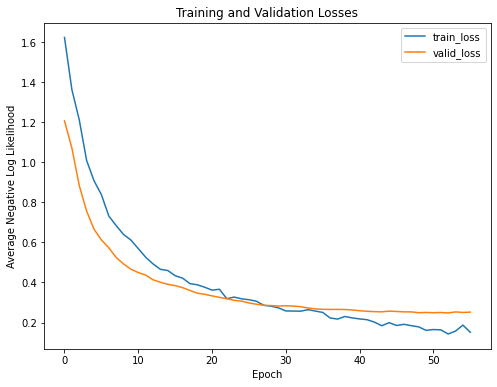

In [96]:
plt.figure(figsize=(8, 6))
for c in ['train_loss', 'valid_loss']:
    plt.plot(
        history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Negative Log Likelihood')
plt.title('Training and Validation Losses')

Text(0.5, 1.0, 'Training and Validation Accuracy')

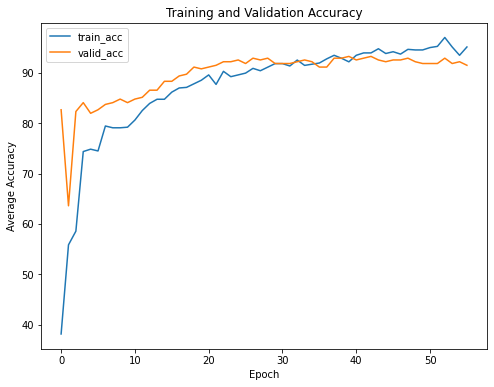

In [97]:
plt.figure(figsize=(8, 6))
for c in ['train_acc', 'valid_acc']:
    plt.plot(
        100 * history[c], label=c)
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Average Accuracy')
plt.title('Training and Validation Accuracy')

## Save Model

In [2]:
def save_checkpoint(model, path):
    """Save a PyTorch model checkpoint

    Params
    --------
        model (PyTorch model): model to save
        path (str): location to save model. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    model_name = path.split('-')[0]
    print(model_name)
    #assert (model_name in ['vgg16', 'resnet50']), "Path must have the correct model name"

    # Basic details
    checkpoint = {
        'class_to_idx': model.class_to_idx,
        'idx_to_class': model.idx_to_class,
        'epochs': model.epochs,
    }

    # Extract the final classifier and the state dictionary
    if model_name == 'vgg16':
        # Check to see if model was parallelized
        if multi_gpu:
            checkpoint['classifier'] = model.module.classifier
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['classifier'] = model.classifier
            checkpoint['state_dict'] = model.state_dict()

    elif model_name == 'resnet50':
        if multi_gpu:
            checkpoint['fc'] = model.module.fc
            checkpoint['state_dict'] = model.module.state_dict()
        else:
            checkpoint['fc'] = model.fc
            checkpoint['state_dict'] = model.state_dict()

    # Add the optimizer
    checkpoint['optimizer'] = model.optimizer
    checkpoint['optimizer_state_dict'] = model.optimizer.state_dict()

    # Save the data to the path
    torch.save(checkpoint, path)

In [9]:
model.optimizer


NameError: ignored

In [119]:
model.optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    eps: 1e-08
    foreach: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [5]:
save_checkpoint(model=model,path="/content/drive/MyDrive/Pytorch_DL/resnet50.pt")

NameError: ignored

In [99]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [113]:
checkpoint_path

'resnet50-transfer.pth'

In [103]:
import shutil 
shutil.copy("/content/resnet50-transfer.pt","/content/drive/MyDrive/Pytorch_DL")

'/content/drive/MyDrive/Pytorch_DL/resnet50-transfer.pt'

## Load Checkpoint

In [104]:
def load_checkpoint(path):
    """Load a PyTorch model checkpoint

    Params
    --------
        path (str): saved model checkpoint. Must start with `model_name-` and end in '.pth'

    Returns
    --------
        None, save the `model` to `path`

    """

    # Get the model name
    model_name = path.split('-')[0]
    assert (model_name in ['vgg16', 'resnet50'
                           ]), "Path must have the correct model name"

    # Load in checkpoint
    checkpoint = torch.load(path)

    if model_name == 'vgg16':
        model = models.vgg16(pretrained=True)
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.classifier = checkpoint['classifier']

    elif model_name == 'resnet50':
        model = models.resnet50(pretrained=True)
        # Make sure to set parameters as not trainable
        for param in model.parameters():
            param.requires_grad = False
        model.fc = checkpoint['fc']

    # Load in the state dict
    model.load_state_dict(checkpoint['state_dict'])

    total_params = sum(p.numel() for p in model.parameters())
    print(f'{total_params:,} total parameters.')
    total_trainable_params = sum(
        p.numel() for p in model.parameters() if p.requires_grad)
    print(f'{total_trainable_params:,} total gradient parameters.')

    # Move to gpu
    if multi_gpu:
        model = nn.DataParallel(model)

    if train_on_gpu:
        model = model.to('cuda')

    # Model basics
    model.class_to_idx = checkpoint['class_to_idx']
    model.idx_to_class = checkpoint['idx_to_class']
    model.epochs = checkpoint['epochs']

    # Optimizer
    optimizer = checkpoint['optimizer']
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

    return model, optimizer

In [106]:
model, optimizer = load_checkpoint(path="/content/resnet50-transfer.pt")

AssertionError: ignored